<a href="https://colab.research.google.com/github/edwinduque11/EdwinDuque_IA_para_las_ciencias_e_ingenierias_2023-2/blob/main/02_Limpieza_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza de datos

In [ ]:
#Importamos las librerias que se usaran.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Cargar los archivos desde Kaggle
tener en cuenta que se deben aceptar las reglas de la competencia en el siguiente link: https://www.kaggle.com/competitions/playground-series-s3e20/rules

ademas se debe ingresar con el usuario y clave para descargar los archivos (estos se pueden ver creando un nuevo token en la parte de configuraciones del Kaggle)

In [ ]:
!pip install opendatasets
import opendatasets as od

{"username":"edwinduque11","key":"6707cd44b7a2cd12746041dfe56c8173"}

In [ ]:

dataset_link="https://www.kaggle.com/competitions/playground-series-s3e20/data"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: edwinduque11
Your Kaggle Key: ··········


100%|██████████| 48.9M/48.9M [00:00<00:00, 72.4MB/s]



Extracting archive ./playground-series-s3e20/playground-series-s3e20.zip to ./playground-series-s3e20


In [ ]:
import os
os.chdir("playground-series-s3e20")
os.listdir()

['test.csv', 'train.csv', 'sample_submission.csv']

In [ ]:
d = pd.read_csv("train.csv")
d.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# Generamos algunas columnas categoricas

In [ ]:
list_catgr = ["SulphurDioxide_SO2_column_number_density_amf", "CarbonMonoxide_CO_column_number_density", "NitrogenDioxide_NO2_column_number_density", "Formaldehyde_tropospheric_HCHO_column_number_density", "UvAerosolIndex_absorbing_aerosol_index", "Ozone_O3_column_number_density", "Ozone_solar_zenith_angle"]
d_01 = d.copy()

for i in list_catgr:
  intervalo = np.linspace(d_01[i].min(), d_01[i].max(), 20).tolist()
  d_01[i] = pd.cut(d_01[i], bins=intervalo, labels=list(range(5,100,5)))



In [ ]:
d_01.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,25,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,30,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,30,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,30,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


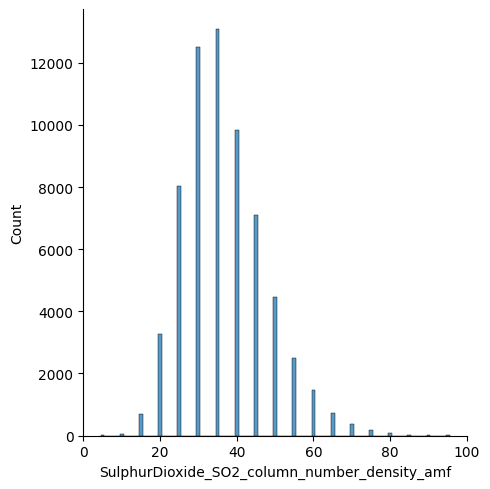

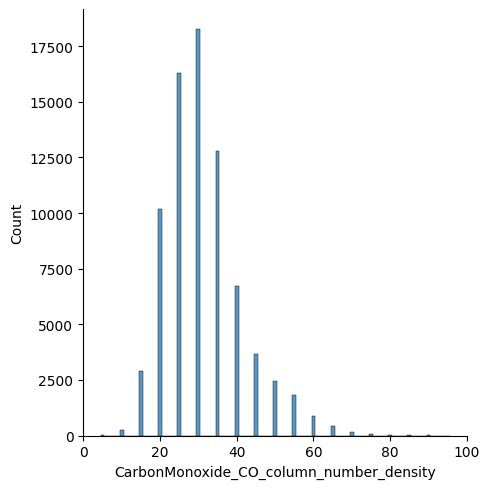

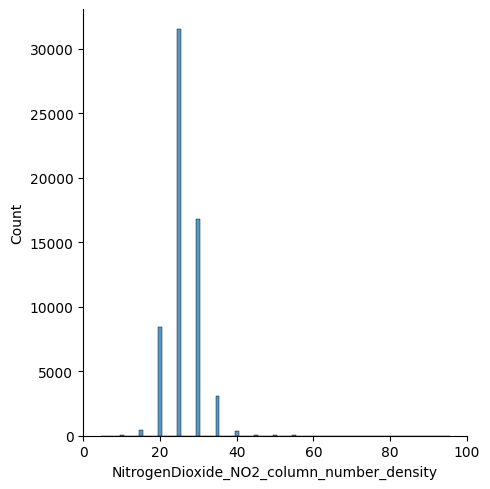

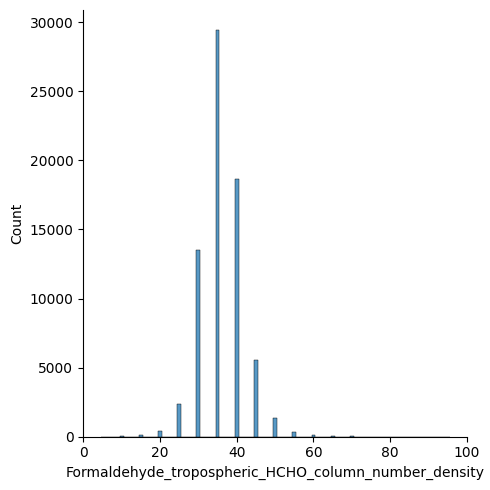

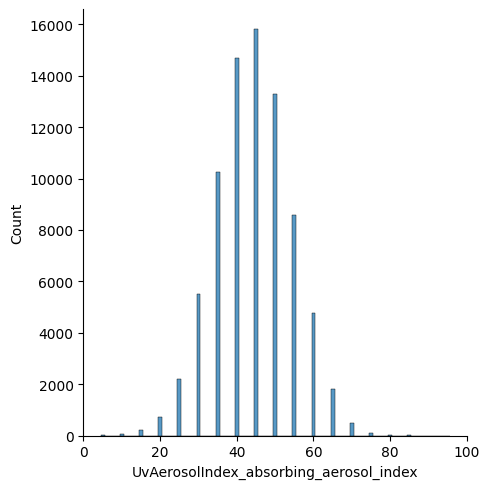

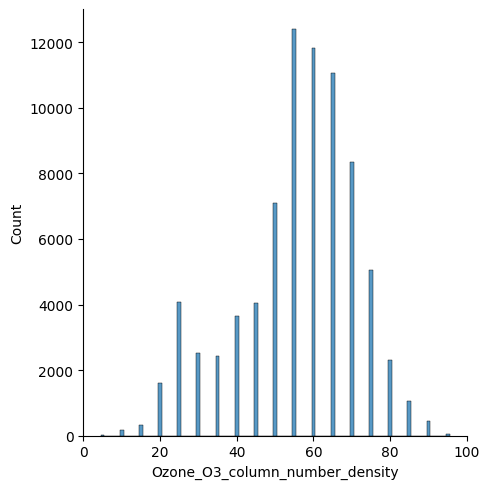

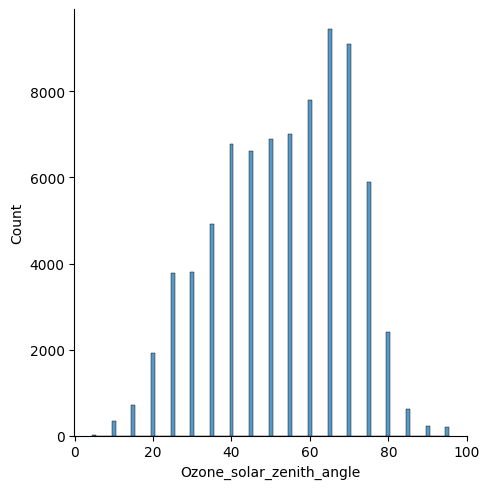

In [ ]:
for i in list_catgr:
  sns.displot(d_01[i])
  plt.show()

#Manejo de datos faltantes

Empezaremos eliminando aquellas columnas donde se tienen mas del 10% de datos faltantes

In [ ]:
porcentaje_faltantes = d_01.isna().mean() * 100
columnas_a_eliminar = porcentaje_faltantes[porcentaje_faltantes > 10].index
print(columnas_a_eliminar)
d_02 = d_01.drop(columns=columnas_a_eliminar)
print (d_02.shape)

Index(['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'Nitrogen

Hora debemos rellenar los datos que siguen estando faltantes

In [ ]:
#Porcentaje de datos faltantes para cada variable del dataset
total           = d_02.isnull().sum().sort_values(ascending=False)
percent         = (d_02.isnull().sum()/d_02.isnull().count()*100).sort_values(ascending=False)
missing_train1  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train1

,Total,Percent
Formaldehyde_tropospheric_HCHO_column_number_density,7278,9.209977
Formaldehyde_tropospheric_HCHO_column_number_density_amf,7277,9.208711
Formaldehyde_sensor_zenith_angle,7277,9.208711
Formaldehyde_solar_azimuth_angle,7277,9.208711
Formaldehyde_solar_zenith_angle,7277,9.208711
Formaldehyde_cloud_fraction,7277,9.208711
Formaldehyde_HCHO_slant_column_number_density,7277,9.208711
Formaldehyde_sensor_azimuth_angle,7277,9.208711
CarbonMonoxide_CO_column_number_density,2123,2.686560
CarbonMonoxide_sensor_altitude,2122,2.685294


In [ ]:
# Completar los valores faltantes en las columnas restantes con la moda
for feature in d_02.columns:
    if d_02[feature].isnull().sum() > 0:
        mode_value = d_02[feature].mode()[0] # Calcular la moda de la columna
        d_02[feature].fillna(mode_value, inplace=True)

print(d_02.head)

<bound method NDFrame.head of            ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0      ID_-0.510_29.290_2019_00    -0.510     29.290  2019        0   
1      ID_-0.510_29.290_2019_01    -0.510     29.290  2019        1   
2      ID_-0.510_29.290_2019_02    -0.510     29.290  2019        2   
3      ID_-0.510_29.290_2019_03    -0.510     29.290  2019        3   
4      ID_-0.510_29.290_2019_04    -0.510     29.290  2019        4   
...                         ...       ...        ...   ...      ...   
79018  ID_-3.299_30.301_2021_48    -3.299     30.301  2021       48   
79019  ID_-3.299_30.301_2021_49    -3.299     30.301  2021       49   
79020  ID_-3.299_30.301_2021_50    -3.299     30.301  2021       50   
79021  ID_-3.299_30.301_2021_51    -3.299     30.301  2021       51   
79022  ID_-3.299_30.301_2021_52    -3.299     30.301  2021       52   

      CarbonMonoxide_CO_column_number_density  \
0                                          35   
1                  